**Hyperparameter Tuning:**

Hyperparameter Tuning refers to the process of choosing the optimal set of hyperparameters for a machine learning model. This is also called hyper parameter optimization. 

It is of two types:


1.   GridSearchCV

2.   RandomizedSearchCV

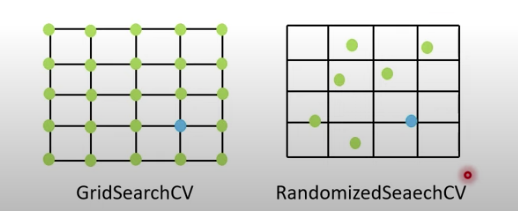

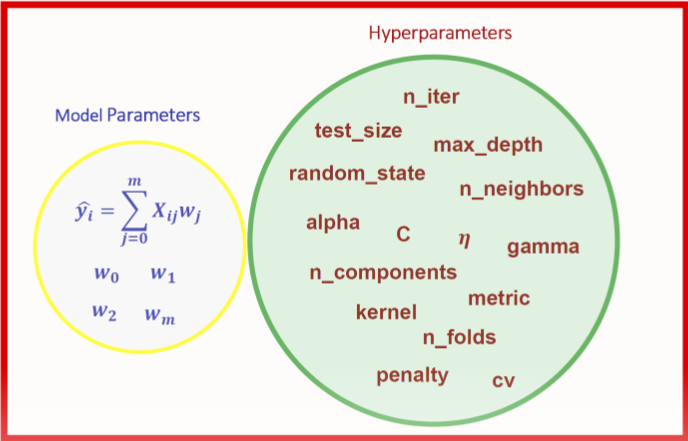

In [1]:
#importing the dependencies

import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

We will be implementing two types of Hyper Parameter tuning using Breast Cancer Dataset which is already available for use in Scikit Learn Library. 

In [2]:
#loading the data from sklearn

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [6]:
#loading the data to a pandas dataframe

df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [4]:
#printing the first five rows of the dataframe

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['label'] = breast_cancer_dataset.target

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [14]:
#checking the number of rows and columns in this dataset
df.shape

(569, 31)

In [13]:
#checking for the missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [15]:
#checking the distribution of target variable

df.label.value_counts()

1    357
0    212
Name: label, dtype: int64

Here:

**1 ----> Benign**

**0 ----> Malignant**

#### Seperating the features and Target:

In [21]:
X = df.drop(columns='label', axis=1)
y = df['label']

In [22]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [26]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [27]:
X = np.asarray(X)
y = np.asarray(y)

#### GridSearchCV

The Machine Learning model is evaluated for a set of hyperparameter values. This approach is called GridSearchCV.

Drawback - GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.

Here we are using Support Vector Classifier to implement the both types of hyperparatmeter tuning using Kernel and different C values. 

In [28]:
#loading the instance of the model

model = SVC()

In [30]:
#hyperparameters

parameters = {
                'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                'C':[1, 5, 10, 20]
}

In [31]:
#gridSearchCV Implementation

classifier = GridSearchCV(model, parameters, cv=5)

In [32]:
#fitting the data to our model

classifier.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [43]:
classifier.cv_results_

{'mean_fit_time': array([1.51041131e+00, 3.28378677e-03, 4.56523895e-03, 1.06773376e-02,
        2.90648470e+00, 3.34820747e-03, 4.11963463e-03, 9.71722603e-03,
        4.19727855e+00, 3.66787910e-03, 3.96442413e-03, 9.72385406e-03,
        7.43297162e+00, 4.12425995e-03, 3.90987396e-03, 9.25521851e-03]),
 'std_fit_time': array([7.16844675e-01, 9.92692510e-05, 3.54879724e-04, 1.21809201e-03,
        6.03930932e-01, 3.44269414e-04, 5.54285305e-04, 5.03625194e-04,
        9.16762572e-01, 2.00224678e-04, 1.19941276e-04, 4.86775293e-04,
        2.48711928e+00, 8.40073674e-05, 3.01827126e-04, 6.17865884e-04]),
 'mean_score_time': array([0.00135045, 0.00094085, 0.002595  , 0.00255303, 0.00075235,
        0.00088983, 0.00243287, 0.00235171, 0.00070992, 0.00085707,
        0.00219088, 0.00243158, 0.00069256, 0.00085621, 0.00202084,
        0.0022346 ]),
 'std_score_time': array([1.16110108e-03, 2.47847093e-05, 1.21413022e-04, 1.11516237e-04,
        4.13436240e-05, 4.57844131e-05, 1.88921317e-

In [34]:
#best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [35]:
#highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [36]:
#loading the results into pandas dataframe

result = pd.DataFrame(classifier.cv_results_)

In [37]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.510411,0.716845,0.001350,0.001161,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003284,0.000099,0.000941,0.000025,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004565,0.000355,0.002595,0.000121,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.010677,0.001218,0.002553,0.000112,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.906485,0.603931,0.000752,0.000041,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [38]:
grid_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]

In [42]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


Highest Accuracy = 95.2%

Best Parameters = {'C':10, 'kernel' : 'linear'}

## RandomizedSearchCV

In [47]:
#loading the instance of the model

model = SVC()

In [48]:
#hyperparameters

parameters = {
                'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                'C':[1, 5, 10, 20]
}

In [53]:
#gridSearchCV Implementation

classifier = RandomizedSearchCV(model, parameters, cv=5)

In [54]:
#fitting the data to our model

classifier.fit(X,y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [55]:
classifier.cv_results_

{'mean_fit_time': array([1.47273226e+00, 3.86953354e-03, 7.05537806e+00, 5.37700653e-03,
        1.06770039e-02, 3.80239487e-03, 3.15225043e+00, 3.84650230e-03,
        9.21621323e-03, 9.18445587e-03]),
 'std_fit_time': array([5.94704699e-01, 1.87254869e-04, 2.21070096e+00, 7.36810983e-04,
        1.18377053e-03, 5.48836972e-04, 6.39254858e-01, 1.70633670e-04,
        5.31561301e-04, 5.99713558e-04]),
 'mean_score_time': array([0.00114784, 0.00194907, 0.00073056, 0.00291677, 0.00304441,
        0.00127029, 0.00087156, 0.00180655, 0.00220227, 0.00229168]),
 'std_score_time': array([5.15549548e-04, 6.11323090e-05, 4.19257292e-05, 4.31899567e-04,
        6.86738111e-04, 3.36089801e-04, 2.27694342e-04, 4.66992316e-05,
        8.33254345e-05, 1.82588849e-04]),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'sigmoid', 'poly',
                    'linear', 'rbf', 'sigmoid', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
         

In [56]:
#best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 5}


In [57]:
#highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9508150908244062


In [58]:
#loading the results into pandas dataframe

result = pd.DataFrame(classifier.cv_results_)

In [59]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.472732,0.594705,0.001148,0.000516,linear,1,"{'kernel': 'linear', 'C': 1}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,3
1,0.003870,0.000187,0.001949,0.000061,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.877193,0.921053,0.912281,0.956140,0.946903,0.922714,0.027879,4
2,7.055378,2.210701,0.000731,0.000042,linear,20,"{'kernel': 'linear', 'C': 20}",0.929825,0.956140,0.956140,0.938596,0.964602,0.949061,0.012816,2
3,0.005377,0.000737,0.002917,0.000432,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,6
4,0.010677,0.001184,0.003044,0.000687,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,8


In [60]:
grid_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]

In [42]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


Highest Accuracy = 95.08%

Best Parameters = {'C':5, 'kernel' : 'linear'}